##### Chris Buie Challenge04

In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

#### Exercise 4.1

Generate (fake) data that is linearly related to log(x).
You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

##### Then fit two models to it:
###### 1) quadratic (second degree polynomial)
###### 2) logarithmic (log(x))




In [101]:
#generate fake data
def gen_log_data(x, b, b1, e):
    return b * np.log(b1 * x) + e

x = np.linspace(1,300,1000)
y = gen_log_data(x, 1.1, 3.5, 0.2)
yn = y + 0.2*np.random.normal(size=len(x))
x = x.reshape(-1, 1); y = yn.reshape(-1, 1)
# popt, pcov = curve_fit(gen_log_data, x, yn)

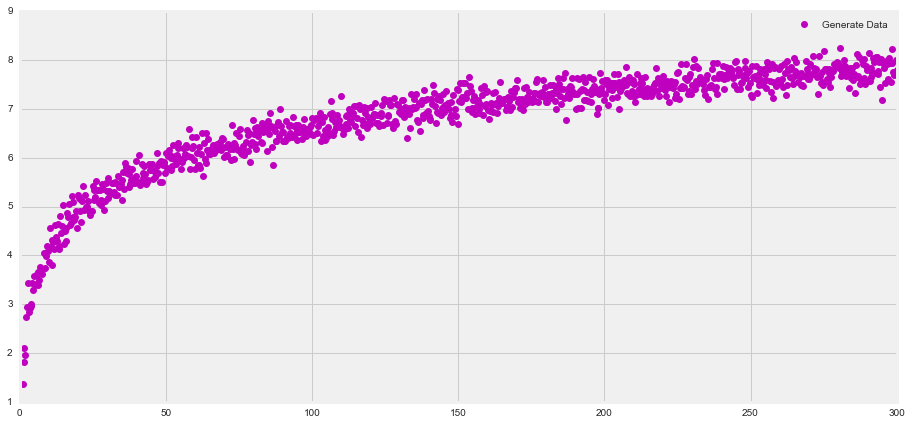

In [102]:
#plot fake data with logarithm 
plt.figure(figsize=(14,7))
plt.plot(x, yn, 'mo', label="Generate Data", )
# plt.plot(x, gen_log_data(x, *popt), 'k-', label="Log Curve")
plt.legend()
# plt.yscale('log')
plt.show()

##### Quadratic

In [103]:
#split test and train groups for quadratic and check len():

X_train, X_test, y_train, y_test = train_test_split(np.square(x), y, test_size=0.3,random_state=42)
print len(X_train), len(X_test), len(y_train), len(y_test)

700 300 700 300


In [104]:
model_lr = LinearRegression(fit_intercept=True, normalize=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
print 'RMSE: %s' % RMSE_lr
print 'R2: %s' % model_lr.score(X_test,y_test)

RMSE: 0.725636154748
R2: 0.556020682662


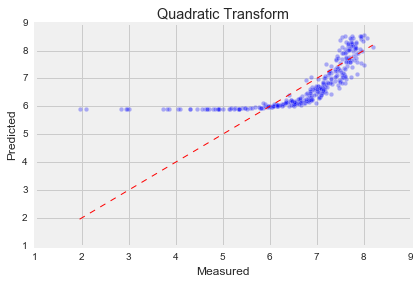

In [105]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_vals_lr, alpha = .3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Quadratic Transform');



##### Logarithmic

In [106]:
#split test and train groups for logrithmic and check len():

X_train, X_test, y_train, y_test = train_test_split(np.log(x), y, test_size=0.3,random_state=42)
print len(X_train), len(X_test), len(y_train), len(y_test)

700 300 700 300


In [107]:
model_lr = LinearRegression(fit_intercept=True, normalize=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
print 'RMSE: %s' % RMSE_lr
print 'R2: %s' % model_lr.score(X_test,y_test)

RMSE: 0.184418610235
R2: 0.971322954703


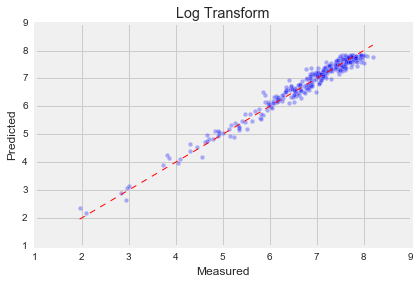

In [108]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_vals_lr, alpha = .3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Log Transform');



#### Exercise 4.2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)
Split the data into a training and test set. Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set. (You could use sklearn.metrics.mean_squared_error.)



In [109]:
#generate fake data
def gen_data(x, b, b1,b2, e):
    return b + b1*x + np.square(b2*x) + e

x = np.linspace(1,300,1000)
y = gen_data(x, 0.3, 3, 20, 0.1)
yn = y + 0.5*np.random.normal(size=len(x))
x = x.reshape(-1, 1); y = yn.reshape(-1, 1)
# popt, pcov = curve_fit(gen_data, x, yn)

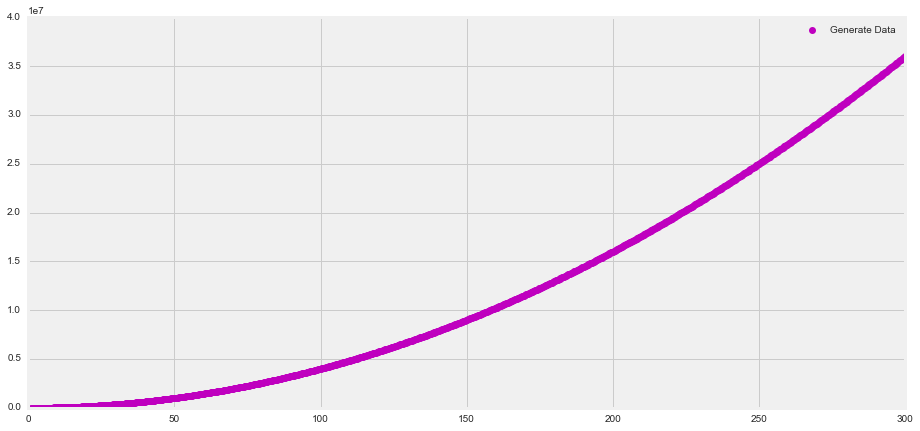

In [110]:
#plot fake data with logarithm 
plt.figure(figsize=(14,7))
plt.plot(x, y, 'mo', label="Generate Data", )
# plt.plot(x, gen_log_data(x, *popt), 'k-', label="Log Curve")
plt.legend()
# plt.yscale('log')
plt.show()

In [111]:
#split test and train groups and check len():

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
print len(X_train), len(X_test), len(y_train), len(y_test)

700 300 700 300


In [112]:
model_lr = LinearRegression(fit_intercept=True, normalize=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)
RMSE_lr = np.sqrt(np.sum((pred_vals_lr - y_test)**2)/len(y_test))
print 'RMSE: %s' % RMSE_lr
print 'R2: %s' % model_lr.score(X_test,y_test)

RMSE: 2749113.81666
R2: 0.937326548264


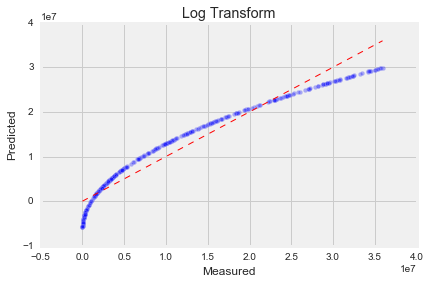

In [113]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred_vals_lr, alpha = .3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Log Transform');



#### Exercise 4.3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared

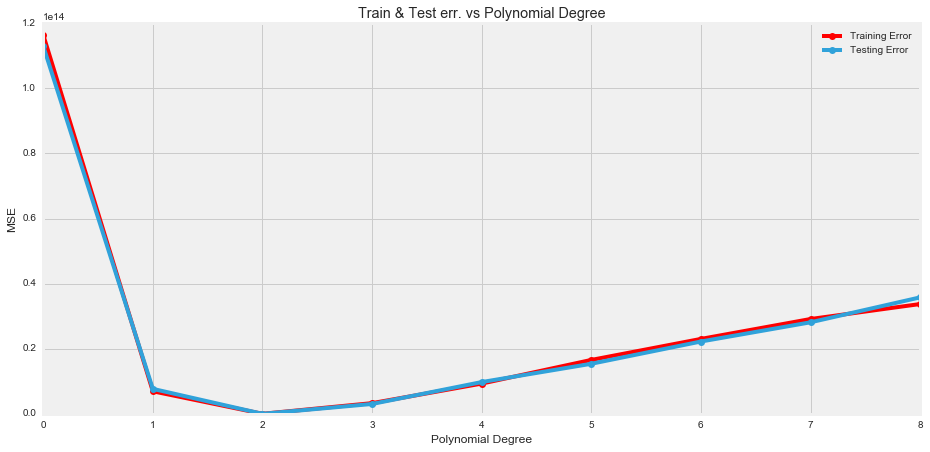

In [114]:
train_error = []
test_error = []
train_r2 = []
test_r2 = []
lr = LinearRegression()

for i in range (0, 8+1):
    X = np.power(x, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_pred))
    
    train_r2.append(lr.score(X_test, y_test))
    
    test_r2.append(lr.score(X_test, y_test))

    
polynomial = list(range(0,8+1))
plt.figure(figsize=(14,7))
plt.plot(polynomial, train_error,'ro-', label = 'Training Error', )
# plt.plot(polynomial, train_error,'r', label = 'Training Error', )
plt.plot(polynomial, test_error, 'o-', label = 'Testing Error', )
# plt.plot(polynomial, test_error, 'b--', label = 'Testing Error', )
plt.legend()
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.title('Train & Test err. vs Polynomial Degree');


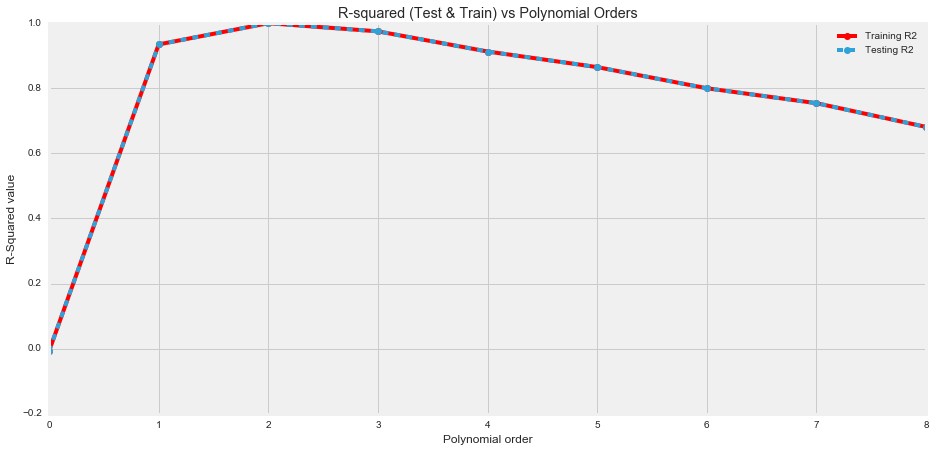

In [115]:
plt.figure(figsize=(14,7))
plt.plot(polynomial, train_r2, 'ro-', label = 'Training R2', )
plt.plot(polynomial, test_r2, 'o--', label = 'Testing R2', )
plt.title('R-squared (Test & Train) vs Polynomial Orders')
plt.xlabel('Polynomial order')
plt.ylabel('R-Squared value')
plt.legend();

#### Exercise 4.4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [116]:
# To generate the correct data set you have to run gen_data from that set.  
# I kept the same veriables throughout the challenge


n = list(range(5,1001, 5))
train_error = []
test_error = []
X = np.square(x)
lr = LinearRegression()

for i in n:
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.75)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    X_train = X_train[:i,:]
    y_train = y_train[:i]
    
    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_pred))

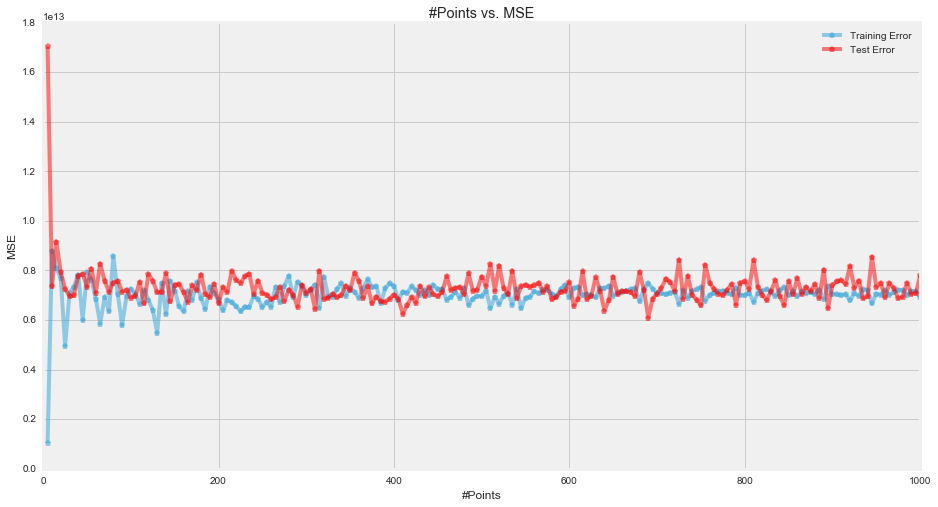

In [117]:
plt.figure(figsize=(14,8))
plt.plot(m, train_error, 'p-', label = 'Training Error',alpha=0.5)
plt.plot(m, test_error, 'rp-', label = "Test Error",alpha=0.5)
plt.legend()
plt.xlabel('#Points')
plt.ylabel('MSE')
plt.title('#Points vs. MSE');